<a href="https://colab.research.google.com/github/AutoViML/lazytransform/blob/main/Featurewiz_LazyTransform_Demo2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This is a LazyTransformer demo along with FeatureWiz on NLP datasets
The airbnb dataset is available at: https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
np.random.seed(0)

In [2]:
#####   Use this for debugging/development version ############
import featurewiz as FW

Imported featurewiz. Version = 0.1.26. Now with dask, XGBoost-GPU and feather-format.
outputs = featurewiz(dataname, target, corr_limit=0.70, verbose=2, sep=',', 
		header=0, test_data='',feature_engg='', category_encoders='',
		dask_xgboost_flag=False, nrows=None)
Create new features via 'feature_engg' flag : ['interactions','groupby','target']
                                


In [3]:
from lazytransform import LazyTransformer

Imported LazyTransformer version:0.30. Call by using:
    lazy = LazyTransformer(model=None, encoders='auto', scalers=None, 
        date_to_string=False, transform_target=False, imbalanced=False)
    ### if you are not using a model in pipeline, you must use fit and transform ##
        X_trainm, y_trainm = lazy.fit_transform(X_train, y_train)
        X_testm = lazy.transform(X_test)
    ### If using a model in pipeline, use fit and predict only ###
        lazy.fit(X_train, y_train)
        lazy.predict(X_test)



In [4]:
# The AirBNB dataset is available at: https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data
datapath = '../Ram/Data_Sets/'
filename = "airbnb.csv"
trainfile = datapath+filename
sep = ','
dft = pd.read_csv(trainfile, sep=sep,nrows=200000)
print(dft.shape)
dft.head()

(20837, 106)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,target,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,6369,https://www.airbnb.com/rooms/6369,20190919050215,2019-09-19,"Rooftop terrace room with ensuite bathroom, Airc.","Atico en la calle Principe de Vergara, con bañ...",BETTER THAN A HOTEL.Upscale neighboorhood (Met...,BETTER THAN A HOTEL.Upscale neighboorhood (Met...,none,Nice and definitely non touristic neighborhoo...,...,f,f,flexible,f,f,1,0,1,0,0.56
1,21853,https://www.airbnb.com/rooms/21853,20190919050215,2019-09-19,Bright and airy room,We have a quiet and sunny room with a good vie...,I am living in a nice flat near the centre of ...,We have a quiet and sunny room with a good vie...,none,We live in a leafy neighbourhood with plenty o...,...,f,f,strict_14_with_grace_period,f,f,2,0,2,0,0.55
2,24805,https://www.airbnb.com/rooms/24805,20190919050215,2019-09-19,Gran Via Studio Madrid,"Studio located 50 meters from Gran Via, next t...",LOCATION. Brand new flats near the Atlantic H...,"Studio located 50 meters from Gran Via, next t...",none,"The area is next to the Gran Via, so people li...",...,f,f,moderate,f,f,1,1,0,0,0.03
3,24836,https://www.airbnb.com/rooms/24836,20190919050215,2019-09-19,"Select the Madrid more ""cool"".",Apartamento céntrico junto a Gran Vía (VT-296)...,"Select the Madrid more ""cool"" : 70 m, 2 bedroo...","Select the Madrid more ""cool"" : 70 m, 2 bedroo...",none,"Cosmopolita, lleno de locales de moda, restaur...",...,f,f,moderate,f,f,1,1,0,0,0.63
4,26825,https://www.airbnb.com/rooms/26825,20190919050215,2019-09-19,Single Room whith private Bathroom,Nice and cozy roon for one person with a priva...,Nice and cozy roon for one person with a priva...,Nice and cozy roon for one person with a priva...,none,"Es un barrio muy tranquilo, en una zona de Mad...",...,f,f,strict_14_with_grace_period,f,f,1,0,1,0,1.19


In [5]:
target = 'target'
modeltype = 'Classification'

In [6]:
preds = [x for x in list(dft) if x not in [target]]
X = dft[preds]
y = dft[target]

In [7]:
encoders = 'auto'
scalers = 'std'

# LightGBM is used here. But you can use any sklearn model.

In [8]:
import lightgbm as lgbm
from sklearn.multioutput import MultiOutputRegressor, MultiOutputClassifier
if modeltype == 'Regression':
    lgb = lgbm.LGBMRegressor(device="cpu")
    if isinstance(target, list):
        if len(target) > 1:
            lgb = MultiOutputRegressor(lgb)
else:
    lgb = lgbm.LGBMClassifier(device="cpu")
    if isinstance(target, list):
        if len(target) > 1:
            lgb = MultiOutputClassifier(lgb)

In [9]:
import featurewiz as FW

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=99)
print(X_train.shape, X_test.shape)

(16669, 105) (4168, 105)


In [11]:
y_train.head()

10078    t
11888    f
15596    t
11514    f
7178     t
Name: target, dtype: object

# Baseline model with all features - let's see performance

In [12]:
print('all features = %d' %X_train.shape[1])

all features = 105


In [13]:
sim = LazyTransformer(model=lgb, encoders='auto',scalers=scalers, transform_target=True,
                      imbalanced=False, verbose=2)
sim

In [14]:
### If using a model in pipeline, use fit and predict only ###
sim.fit(X_train, y_train)

#### Single_Label Binary_Classification problem ####
Shape of dataset: (16669, 105). Now we classify variables into different types...
    since name's max string size 118 >= 50, re-classifying it as NLP variable
    since summary's max string size 1000 >= 50, re-classifying it as NLP variable
    since space's max string size 1000 >= 50, re-classifying it as NLP variable
    since description's max string size 1000 >= 50, re-classifying it as NLP variable
    since neighborhood_overview's max string size 1000 >= 50, re-classifying it as NLP variable
    since notes's max string size 1000 >= 50, re-classifying it as NLP variable
    since transit's max string size 1000 >= 50, re-classifying it as NLP variable
    since access's max string size 1000 >= 50, re-classifying it as NLP variable
    since interaction's max string size 1000 >= 50, re-classifying it as NLP variable
    since house_rules's max string size 1000 >= 50, re-classifying it as NLP variable
    since picture_url's max 

In [15]:
### If using a model in pipeline, use fit and predict only ###
predictions = sim.predict(X_test)

In [16]:
### In case the target variable is categorical, you can use yformer to transform ##
sim.yformer.transform(X_test,y_test).values

array([1, 1, 1, ..., 1, 1, 0])

In [17]:
predictions

array([1, 1, 0, ..., 1, 1, 0])

In [18]:
import sklearn
if modeltype == 'Regression':
    print('R-squared = %0.0f%%' %(100*sklearn.metrics.r2_score(y_test, predictions)))
    print('RMSE = %0.2f' %np.sqrt(sklearn.metrics.mean_squared_error(y_test, predictions)))
else:
    if y_test.dtype == object:
        print(sklearn.metrics.classification_report(sim.yformer.transform(X_test,y_test).values, predictions))
    else:
        print(sklearn.metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.74      0.68      0.71      1624
           1       0.81      0.85      0.83      2544

    accuracy                           0.78      4168
   macro avg       0.78      0.77      0.77      4168
weighted avg       0.78      0.78      0.78      4168



# Let's compare it with a model with select features from featurewiz

In [19]:
sim = LazyTransformer(model=lgb, encoders=encoders,scalers=scalers, transform_target=True,
                      imbalanced=False, verbose=2)

In [20]:
pd.concat([X_train,y_train],axis=1).shape

(16669, 106)

In [21]:
X_train_trans, y_train_trans = sim.fit_transform(X_train, y_train)
X_train_trans.shape

#### Single_Label Binary_Classification problem ####
Shape of dataset: (16669, 105). Now we classify variables into different types...
    since name's max string size 118 >= 50, re-classifying it as NLP variable
    since summary's max string size 1000 >= 50, re-classifying it as NLP variable
    since space's max string size 1000 >= 50, re-classifying it as NLP variable
    since description's max string size 1000 >= 50, re-classifying it as NLP variable
    since neighborhood_overview's max string size 1000 >= 50, re-classifying it as NLP variable
    since notes's max string size 1000 >= 50, re-classifying it as NLP variable
    since transit's max string size 1000 >= 50, re-classifying it as NLP variable
    since access's max string size 1000 >= 50, re-classifying it as NLP variable
    since interaction's max string size 1000 >= 50, re-classifying it as NLP variable
    since house_rules's max string size 1000 >= 50, re-classifying it as NLP variable
    since picture_url's max 

(16669, 375)

In [22]:
X_test_trans = sim.transform(X_test)
X_test_trans.shape

    Time taken to transform dataset = 5 second(s)


(4168, 375)

# If you have NLP vars, featurewiz will automatically drop them hence use lazytransform to create word vectors. Hence it is better to run featurewiz first and then lazytransform even in NLP datasets.

############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
**INFO: featurewiz can now read feather formatted files. Loading train data...
    Shape of your Data Set loaded: (16669, 376)
     Loaded. Shape = (16669, 376)
No special characters in dataset predictors. Now checking target variable...
No test data filename given...
Classifying features using a random sample of 10000 rows from dataset...
#### Single_Label Binary_Classification problem ####
    loading a random sample of 10000 rows into pandas for EDA
############## C L A S S I F Y I N 

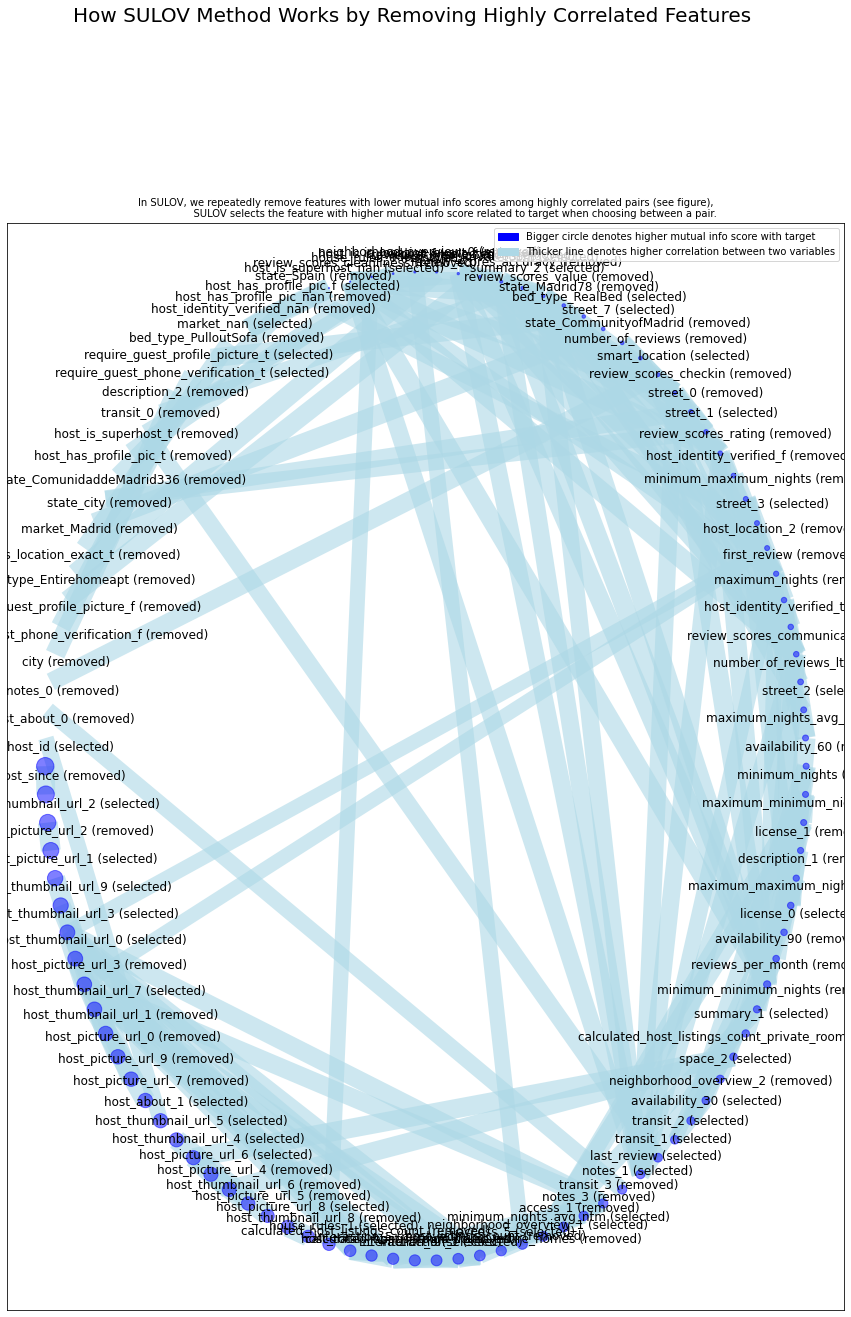

Time taken for SULOV method = 24 seconds
    Adding 0 categorical variables to reduced numeric variables  of 285
Final list of selected vars after SULOV = 285
############## F E A T U R E   S E L E C T I O N  ####################
    using regular XGBoost
Train and Test loaded into Dask dataframes successfully after feature_engg completed
Current number of predictors = 285 
    XGBoost version: 1.5.1
Number of booster rounds = 100
        using 285 variables...
            Time taken for regular XGBoost feature selection = 8 seconds
        using 228 variables...
            Time taken for regular XGBoost feature selection = 15 seconds
        using 171 variables...
            Time taken for regular XGBoost feature selection = 20 seconds
        using 114 variables...
            Time taken for regular XGBoost feature selection = 23 seconds
        using 57 variables...
            Time taken for regular XGBoost feature selection = 25 seconds


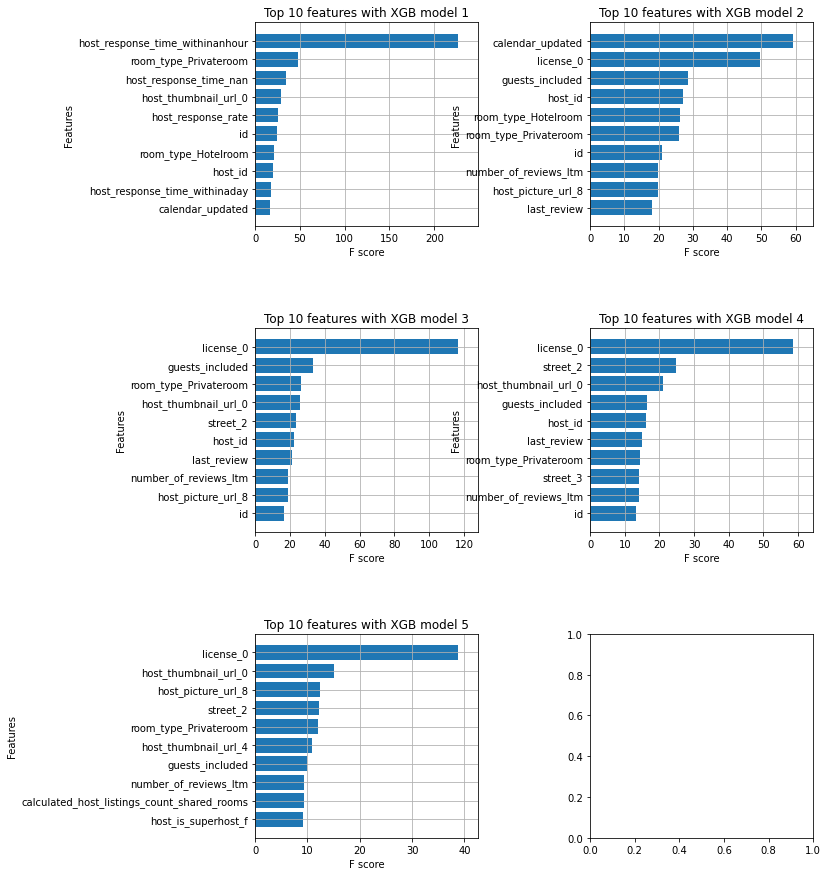

            Total time taken for XGBoost feature selection = 26 seconds
No ID variables [] are selected since they are not considered important for modeling
Selected 71 important features. Too many to print...
    Time taken = 50 seconds
    Reverted column names to original names given in train dataset
Returning list of 71 important features and a dataframe.
    Time taken to create entire pipeline = 52 second(s)


In [23]:
features = FW.FeatureWiz(corr_limit=0.70, feature_engg='', category_encoders='', dask_xgboost_flag=False, nrows=None, verbose=2)
X_train_selected = features.fit_transform(X_train_trans, y_train_trans)
X_test_selected = features.transform(X_test_trans)

In [24]:
select = features.features  ### provides the list of selected features ###
print('Select features = %d' %len(select))
print(select)

Select features = 71
['host_response_time_withinanhour', 'room_type_Privateroom', 'host_response_time_nan', 'host_thumbnail_url_0', 'host_response_rate', 'id', 'room_type_Hotelroom', 'host_id', 'host_response_time_withinaday', 'calendar_updated', 'license_0', 'street_2', 'monthly_price', 'host_location_8', 'house_rules_3', 'host_location_6', 'host_thumbnail_url_3', 'host_is_superhost_f', 'host_verifications_6', 'house_rules_6', 'number_of_reviews_ltm', 'neighbourhood_group_cleansed_Centro', 'guests_included', 'host_picture_url_8', 'host_verifications_7', 'host_thumbnail_url_7', 'host_identity_verified_t', 'minimum_nights_avg_ntm', 'availability_30', 'last_review', 'host_thumbnail_url_9', 'host_verifications_0', 'host_about_3', 'notes_4', 'street_5', 'house_rules_5', 'host_picture_url_1', 'host_location_7', 'calculated_host_listings_count_shared_rooms', 'host_thumbnail_url_4', 'cancellation_policy_flexible', 'interaction_4', 'host_verifications_4', 'host_verifications_8', 'interaction_2

In [29]:
sim = LazyTransformer(model=lgb, encoders=encoders,scalers=scalers, imbalanced=False,transform_target=True)
sim

In [30]:
### If using a model in pipeline, use fit and predict only ###
sim.fit(X_train_selected, y_train)

#### Single_Label Binary_Classification problem ####
Shape of dataset: (16669, 71). Now we classify variables into different types...
    no date time variables detected in this dataset
Time taken to define data pipeline = 1 second(s)
    Data pipeline is saved as: LazyTransformer_pipeline.pkl in current working directory.
model pipeline fitted with LGBMClassifier model


In [31]:
### If using a model in pipeline, use fit and predict only ###
predictions = sim.predict(X_test_selected)
predictions[:3]

array([1, 1, 0])

In [32]:
import sklearn
if modeltype == 'Regression':
    print('R-squared = %0.0f%%' %(100*sklearn.metrics.r2_score(y_test, predictions)))
    print('RMSE = %0.2f' %np.sqrt(sklearn.metrics.mean_squared_error(y_test, predictions)))
else:
    #dicto = {0:'f',1:'t'}
    dicto = {0:0,1:1}
    if y_test.dtype == object:
        print(sklearn.metrics.classification_report(sim.yformer.transform(X_test,y_test).values, pd.Series(predictions).map(dicto)))
    else:
        print(sklearn.metrics.classification_report(y_test, pd.Series(predictions).map(dicto)))

              precision    recall  f1-score   support

           0       0.74      0.67      0.71      1624
           1       0.80      0.85      0.83      2544

    accuracy                           0.78      4168
   macro avg       0.77      0.76      0.77      4168
weighted avg       0.78      0.78      0.78      4168



# So feature selection works better in this case than using all features. You can view the lazytransform pipeline here

In [33]:
from sklearn import set_config
set_config(display="diagram")
sim.xformer
# If you have a model in the pipeline, do:
sim.modelformer

Pipeline(steps=[('data_pipeline',
                 Pipeline(steps=[('scaler_pipeline',
                                  Pipeline(steps=[('complete_pipeline',
                                                   ColumnTransformer(transformers=[('simpleimputer',
                                                                                    SimpleImputer(fill_value=-99,
                                                                                                  strategy='constant'),
                                                                                    ['host_response_time_withinanhour',
                                                                                     'room_type_Privateroom',
                                                                                     'host_response_time_nan',
                                                                                     'host_thumbnail_url_0',
                                                                                     'host_response_rate',
                                                                                     'id',
                                                                                     'room_type_Ho...
                                                                                            'host_is_superhost_f',
                                                                                            'host_verifications_6',
                                                                                            'house_rules_6',
                                                                                            'number_of_reviews_ltm',
                                                                                            'neighbourhood_group_cleansed_Centro',
                                                                                            'guests_included',
                                                                                            'host_picture_url_8',
                                                                                            'host_verifications_7',
                                                                                            'host_thumbnail_url_7',
                                                                                            'host_identity_verified_t',
                                                                                            'minimum_nights_avg_ntm',
                                                                                            'availability_30',
                                                                                            'last_review', ...],
                                                                                'onehot_dict': {}}))]))])),
                ('model', LGBMClassifier(device='cpu'))])

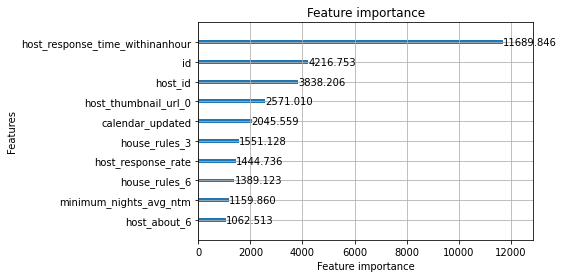

In [35]:
sim.plot_importance()